# Central Tendency

In [1]:
data = [40, 40, 40, 40, 40]

## Mean

In [2]:
# Mean
def mean(x):
    return sum(x) / len(x)

mean(data)

40.0

In [3]:
data1 = data + [40]
mean(data1)

40.0

In [4]:
data2 = data + [10000]
mean(data2)

1700.0

## Mode

In [5]:
from collections import Counter

def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

mode(data)

[40]

## Median

In [8]:
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
median(data)

40

In [9]:
median(data2)

40.0

# Measures of Dispersion

In [10]:
data1 = [40, 40, 40, 40, 40]
data2 = [80, 40, 15, 25, 40]

print("Mean of Data 1 :", mean(data1) ) # 40
print("Mean of Data 2 :", mean(data2) ) # 40
print("Median of Data 1 :", median(data1) ) # 40
print("Median of Data 2 :", median(data2) ) # 40
print("Mode of Data 1 :", mode(data1) )  # [40]
print("Mode of Data 2 :", mode(data2) ) # [40]

Mean of Data 1 : 40.0
Mean of Data 2 : 40.0
Median of Data 1 : 40
Median of Data 2 : 40
Mode of Data 1 : [40]
Mode of Data 2 : [40]


## Range

In [11]:
def data_range(x):
    return max(x) - min(x)

data_range(data1)  # 0


0

In [12]:
data_range(data2)  # 65

65

## Variance

In [13]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def sum_of_squares(y):
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(data1)  # 0


0.0

In [14]:
variance(data2)  # 612

612.5

## Standard Deviation

In [15]:
import math

def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(data1)  # 0


0.0

In [16]:
standard_deviation(data2)  # 24.7

24.748737341529164

# Central Limit Theorem

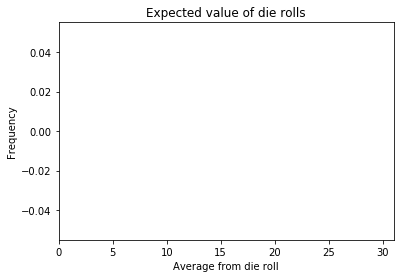

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from wand.image import Image
from wand.display import display

# 1000 simulations of die roll
n, m = 200, 31

# In each simulation, there is one trial more than the previous simulation
avg = []
for i in range(2, n):
    a = np.random.randint(0, m, i)
    avg.append(np.average(a))


# Function that will plot the histogram, where current is the latest figure
def clt(current):
    # if animation is at the last frame, stop it
    plt.cla()
    if current == n: 
        a.event_source.stop()

    plt.xlim(0, m)
    plt.hist(avg[0:current])

    plt.gca().set_title('Expected value of die rolls')
    plt.gca().set_xlabel('Average from die roll')
    plt.gca().set_ylabel('Frequency')

#     plt.annotate('Die roll = {}'.format(current), [3, 27])

fig = plt.figure()
a = animation.FuncAnimation(fig, clt, interval=1, save_count=n)
a.save('animation.gif', writer='imagemagick', fps=10)

# Hypothesis Testing

## One sample t-test

In [19]:
from scipy.stats import ttest_1samp
import numpy as np
from io import StringIO
data = u"1, 2, 3, 4, 5, 6, 7, 8, 9, 10"
ages = np.genfromtxt(StringIO(data), delimiter=",")
print(ages)
ages_mean = np.mean(ages)
print(ages_mean)
tset, pval = ttest_1samp(ages, 30)
print("p-values : ",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
5.5
p-values :  1.023464131265298e-09
 we are rejecting null hypothesis


## Two sample t-test

In [20]:
from scipy.stats import ttest_ind
import numpy as np
from io import StringIO
week1 = u"1, 2, 3, 4, 5, 6, 7, 8, 9, 10"
week2 = u"11, 21, 31, 41, 51, 61, 71, 81, 91, 101"
week1 = np.genfromtxt(StringIO(week1),  delimiter=",")
week2 = np.genfromtxt(StringIO(week2),  delimiter=",")
print(week1)
print("week2 data :-\n")
print(week2)
week1_mean = np.mean(week1)
week2_mean = np.mean(week2)
print("week1 mean value:",week1_mean)
print("week2 mean value:",week2_mean)
week1_std = np.std(week1)
week2_std = np.std(week2)
print("week1 std value:",week1_std)
print("week2 std value:",week2_std)
ttest,pval = ttest_ind(week1,week2)
print("p-value : ",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
week2 data :-

[ 11.  21.  31.  41.  51.  61.  71.  81.  91. 101.]
week1 mean value: 5.5
week2 mean value: 56.0
week1 std value: 2.8722813232690143
week2 std value: 28.722813232690143
p-value :  5.440597450171699e-05
we reject null hypothesis


## Paired sampled t-test

In [23]:
import pandas as pd
from scipy import stats
df = pd.read_csv("/Machine_Learning_Bootcamp/Session_1_Statistics/Data/blood_pressure.csv")
df[['bp_before','bp_after']].describe()
ttest,pval = stats.ttest_rel(df['bp_before'], df['bp_after'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0011297914644840823
reject null hypothesis


## One sample z-test

In [24]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df['bp_before'], x2=None, value=156)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.6651614730255063
accept null hypothesis


## Two sample z-test

In [25]:
ztest ,pval1 = stests.ztest(df['bp_before'], x2=df['bp_after'], value=0,alternative='two-sided')
print(float(pval1))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.002162306611369422
accept null hypothesis


## One Way F-test(Anova) 

In [26]:
df_anova = pd.read_csv('/Machine_Learning_Bootcamp/Session_1_Statistics/Data/PlantGrowth.csv')
df_anova = df_anova[['weight','group']]
grps = pd.unique(df_anova.group.values)
d_data = {grp:df_anova['weight'][df_anova.group == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.0159099583256229
reject null hypothesis


## Two Way F-test(Anova) 

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_anova2 = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")
model = ols('Yield ~ C(Fert)*C(Water)', df_anova2).fit()
print("Overall model F(%s,%s) = %s, p = %s"%(model.df_model,model.df_resid, model.fvalue,model.f_pvalue))

Overall model F(3.0,16.0) = 4.1124444444444475, p = 0.024302580837416664


In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     4.112
Date:                Sat, 11 Apr 2020   Prob (F-statistic):             0.0243
Time:                        13:55:16   Log-Likelihood:                -50.996
No. Observations:                  20   AIC:                             110.0
Df Residuals:                      16   BIC:                             114.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       31.8000      1.549     20.527      0.000      28.516      35.084
C(Fert)[T.B]                    -1.9600      2.191     -0.895      0.384      -6.604       2.684
C(Water)[T.Low]                 -1.8000      2.191     -0.822      0.423      -6.444       2.844
C(Fert)[T.B]:C(Water)[T.Low]    -3.5200      3.098     -1.136      0.273     -10.088       3.048
==============================================================================
Omnibus:                        3.427   Durbin-Watson:                   2.963
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                1.319
Skew:                          -0.082   Prob(JB):                        0.517
Kurtosis:                       1.752   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.766000,0.028847
C(Water),63.368,1.0,5.280667,0.035386
C(Fert):C(Water),15.488,1.0,1.290667,0.272656
Residual,192.000,16.0,NaN,NaN


## Chi-square Test

In [30]:
df_chi = pd.read_csv('/Machine_Learning_Bootcamp/Session_1_Statistics/Data/chi-test.csv')
contingency_table=pd.crosstab(df_chi["Gender"],df_chi["Like Shopping?"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 Like Shopping?  No  Yes
Gender                 
Female           2    3
Male             2    2
Observed Values :-
 [[2 3]
 [2 2]]
Expected Values :-
 [[2.22222222 2.77777778]
 [1.77777778 2.22222222]]
Degree of Freedom:- 1
chi-square statistic:- 0.09000000000000008
critical_value: 3.841458820694124
p-value: 0.7641771556220945
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.09000000000000008
critical_value: 3.841458820694124
p-value: 0.7641771556220945
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


# Skewness

In [31]:
import pandas as pd
import scipy.stats.stats as stats

series = pd.Series(
    {0: -0.051917457635120283,
     1: -0.070071606515280632,
     2: -0.11204865874074735,
     3: -0.14679988245503134,
     4: -0.088062467095565145,
     5: 0.17579741198527793,
     6: -0.10765856028420773,
     7: -0.11971470229167547,
     8: -0.15169210769159247,
     9: -0.038616800990881606,
     10: 0.16988162977411481,
     11: 0.092999418364443032}
)

print ("Skewness :",series.skew())

print (stats.skew(series, bias=False))


Skewness : 1.1119637586658944
1.1119637586658944


# Uniform Distribution

/home/quantiphi/py3_kernel/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


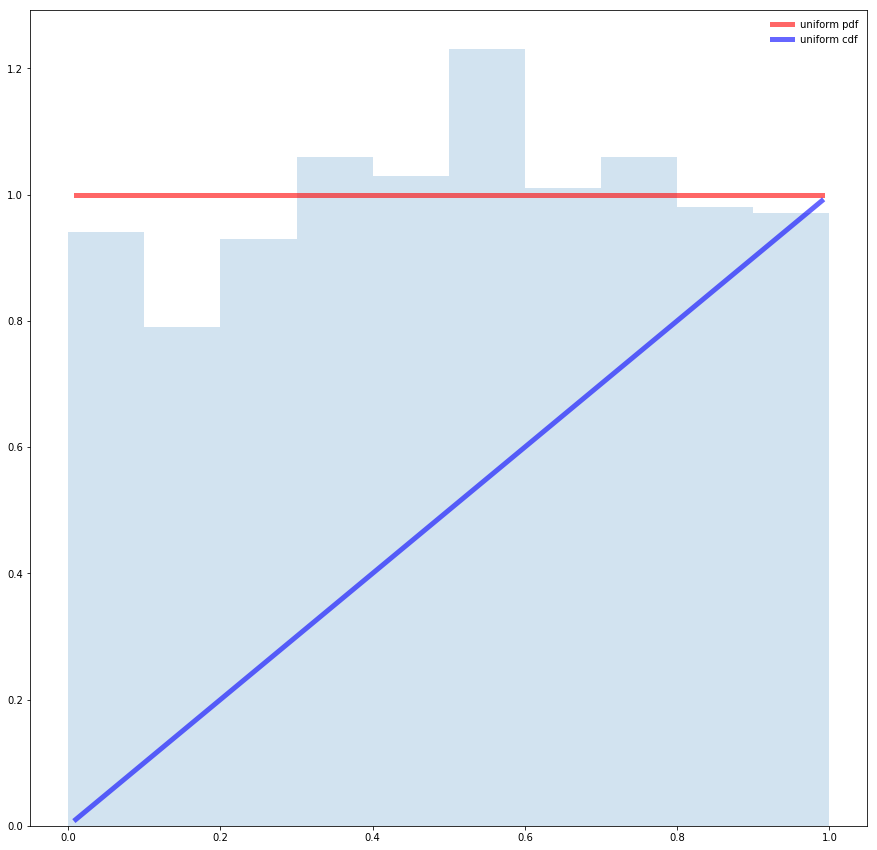

In [32]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np


def uniforms() -> None:
    fig, ax = plt.subplots(1, 1, figsize=(15,15))
    # calculate a few first moments
    mean, var, skew, kurt = uniform.stats(moments='mvsk')
    # display the probability density function (`pdf`)
    x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
    ax.plot(x, uniform.pdf(x),
        'r-', lw=5, alpha=0.6, label='uniform pdf')
    ax.plot(x, uniform.cdf(x),
        'b-', lw=5, alpha=0.6, label='uniform cdf')
    # Check accuracy of `cdf` and `ppf`
    vals = uniform.ppf([0.001, 0.5, 0.999])
    np.allclose([0.001, 0.5, 0.999], uniform.cdf(vals))

    # generate random numbers
    r = uniform.rvs(size=1000)
    # and compare the histogram
    ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    plt.show()

uniforms()

# Normal Distribution

/home/quantiphi/py3_kernel/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


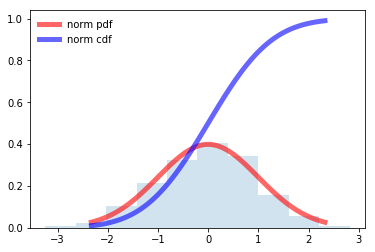

In [33]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np


def normal() -> None:
    fig, ax = plt.subplots(1, 1)
    # calculate a few first moments
    mean, var, skew, kurt = norm.stats(moments='mvsk')
    # display the probability density function (`pdf`)
    x = np.linspace(norm.ppf(0.01),  norm.ppf(0.99), 100)
    ax.plot(x, norm.pdf(x),
        'r-', lw=5, alpha=0.6, label='norm pdf')
    ax.plot(x, norm.cdf(x),
        'b-', lw=5, alpha=0.6, label='norm cdf')
    # check accuracy of `cdf` and `ppf`
    vals = norm.ppf([0.001, 0.5, 0.999])
    np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

    # generate random numbers:
    r = norm.rvs(size=1000)
    # and compare the histogram
    ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    plt.show()

normal()

# Bernoulli Distribution

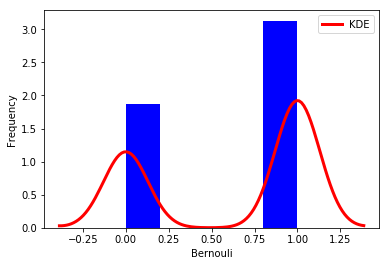

In [34]:
from scipy.stats import bernoulli
import seaborn as sb


def bernoulli_dist(): #-> None:
    data_bern = bernoulli.rvs(size=1000,p=0.6)
    ax = sb.distplot(
        data_bern, 
        kde=True, 
        color='b', 
        hist_kws={'alpha':1},
        kde_kws={'color': 'r', 'lw': 3, 'label': 'KDE'})
    ax.set(xlabel='Bernouli', ylabel='Frequency')

bernoulli_dist()

# Poisson Distribution

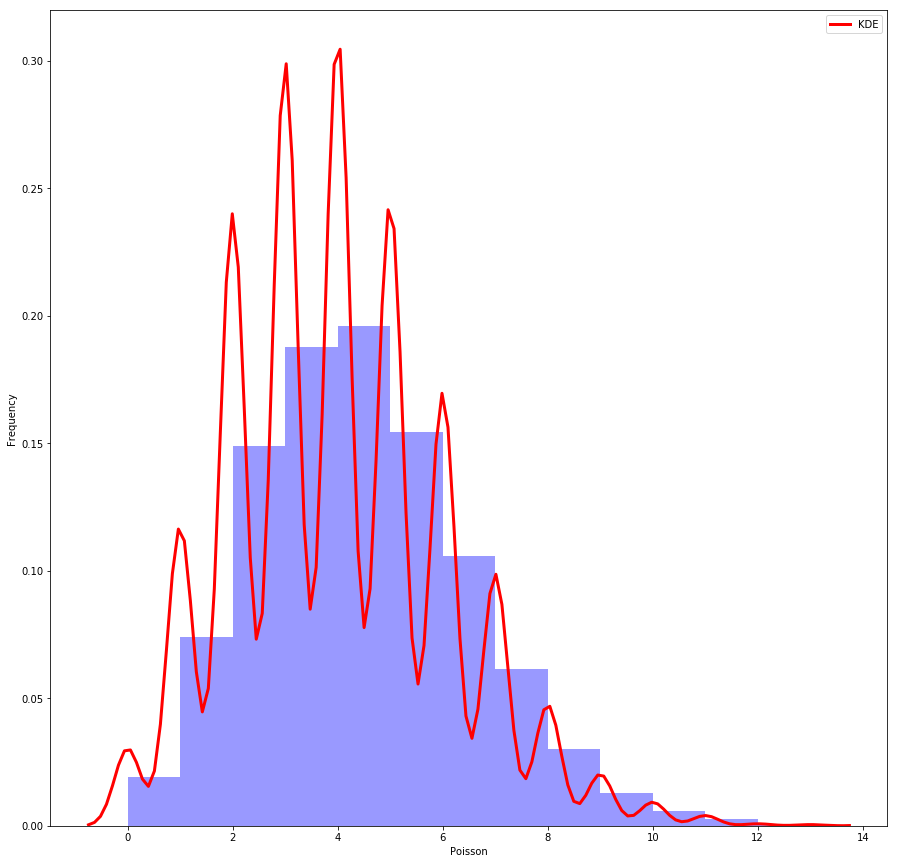

In [35]:
from scipy.stats import poisson
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt


def poisson_dist(): # -> None
    plt.figure(figsize=(15,15))
    data_binom = poisson.rvs(mu=4, size=10000)

    ax = sb.distplot(data_binom, kde=True, color='b', 
                    bins=np.arange(data_binom.min(), data_binom.max() + 1), 
                    kde_kws={'color': 'r', 'lw': 3, 'label': 'KDE'})
    ax.set(xlabel='Poisson', ylabel='Frequency')

poisson_dist()